In [1]:
!pip install torchtext==0.6.0
!pip install spacy==2.2.3
!python -m spacy download en

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 10.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
import torch
import torch.nn as nn
import torchtext.data as ttd
from torchtext.vocab import GloVe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# rename columns to something better
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})

In [8]:
df2 = df[['data', 'b_labels']]
df2.head()

,data,b_labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
df2.to_csv('spam2.csv', index=False)

In [10]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=True,
    tokenize='spacy',
    pad_first=True)

LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

dataset = ttd.TabularDataset(
    path='spam2.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)])

In [11]:
train_dataset, test_dataset = dataset.split() # default is 0.7

In [12]:
TEXT.build_vocab(train_dataset)

In [13]:
vocab = TEXT.vocab

In [14]:
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x7fe5c30c8b90>>,
            {'<unk>': 0,
             '<pad>': 1,
             '.': 2,
             'i': 3,
             'to': 4,
             'you': 5,
             ',': 6,
             'a': 7,
             '?': 8,
             'the': 9,
             '!': 10,
             '...': 11,
             'u': 12,
             'and': 13,
             'is': 14,
             'in': 15,
             'me': 16,
             'for': 17,
             'it': 18,
             'my': 19,
             'your': 20,
             'do': 21,
             '..': 22,
             'of': 23,
             'have': 24,
             'that': 25,
             'call': 26,
             'on': 27,
             "'s": 28,
             '&': 29,
             '2': 30,
             'are': 31,
             'now': 32,
             'so': 33,
             ' ': 34,
             'not': 35,
             'or': 36,
             ':': 37,
             'but': 

In [15]:
vocab.itos

['<unk>',
 '<pad>',
 '.',
 'i',
 'to',
 'you',
 ',',
 'a',
 '?',
 'the',
 '!',
 '...',
 'u',
 'and',
 'is',
 'in',
 'me',
 'for',
 'it',
 'my',
 'your',
 'do',
 '..',
 'of',
 'have',
 'that',
 'call',
 'on',
 "'s",
 '&',
 '2',
 'are',
 'now',
 'so',
 ' ',
 'not',
 'or',
 ':',
 'but',
 "'m",
 'be',
 'at',
 'we',
 'get',
 'will',
 'can',
 'just',
 ';',
 'if',
 'ur',
 'no',
 'with',
 "n't",
 'this',
 '4',
 'nt',
 'up',
 'how',
 'when',
 '-',
 'what',
 'go',
 '*',
 'free',
 'ok',
 'from',
 'all',
 ')',
 'know',
 'got',
 'lt;#&gt',
 '"',
 'out',
 'like',
 'good',
 'then',
 'there',
 'he',
 'its',
 'was',
 "'ll",
 '/',
 'am',
 'time',
 'only',
 'come',
 'did',
 'day',
 'love',
 'want',
 'send',
 'text',
 'about',
 'by',
 'as',
 'one',
 'going',
 'need',
 'stop',
 'home',
 'see',
 'still',
 '_',
 'lor',
 'txt',
 'she',
 'sorry',
 'mobile',
 'reply',
 'today',
 'n',
 'r',
 'back',
 'new',
 'later',
 'our',
 'd',
 'any',
 'here',
 'pls',
 'week',
 'da',
 'has',
 'take',
 'tell',
 'ì',
 'hi',
 '

In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [17]:
train_iter, test_iter = ttd.Iterator.splits(
    (train_dataset, test_dataset), sort_key=lambda x: len(x.data),
    batch_sizes=(32, 256), device=device)

In [18]:
for inputs, targets in train_iter:
    print("inputs: ", inputs, "shape:", inputs.shape)
    print("targets:", targets, "shape:", targets.shape)
    break

inputs:  tensor([[   1,    1,    1,  ..., 1527, 6437,    2],
        [   1,    1,    1,  ...,   12,   89,    2],
        [   1,    1,    1,  ...,    2,   22,   71],
        ...,
        [   1,    1,    1,  ...,  799,   32,   10],
        [   1,    1,    1,  ...,   88,   18,   10],
        [   1,    1,    1,  ...,  211,  114,    8]]) shape: torch.Size([32, 43])
targets: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0]) shape: torch.Size([32])


In [19]:
for inputs, targets in test_iter:
    print("inputs: ", inputs)
    print("targets:", targets)
    break

inputs:  tensor([[ 33,  60,  21,  ..., 406,  21,   2],
        [376,   0,  31,  ...,  15,   0,   8],
        [  3,  82,  96,  ..., 419,  32,   0],
        ...,
        [  1,   1,   1,  ...,   1,   1, 570],
        [  1,   1,   1,  ...,   1,   1,   0],
        [  1,   1,   1,  ...,   1,   1, 570]])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
# define the model
class RNN(nn.Module):
    def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
        super(RNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.M = n_hidden
        self.K = n_outputs
        self.L = n_rnnlayers

        self.embed = nn.Embedding(self.V, self.D)
        self.rnn = nn.LSTM(
            input_size=self.D,
            hidden_size=self.M,
            num_layers=self.L,
            batch_first=True)
        self.fc = nn.Linear(self.M, self.K)

    def forward(self, X):
        h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

        out = self.embed(X)

        out, _ = self.rnn(out, (h0, c0))

        out, _ = torch.max(out, 1)

        out = self.fc(out)
        return out

In [21]:
model = RNN(len(vocab), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(7893, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [22]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [23]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_iter, test_iter, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        t0 = datetime.now()
        train_loss = []

        for inputs, targets in train_iter:
            targets = targets.view(-1, 1).float()

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

        train_loss = np.mean(train_loss)

        test_loss = []
        for inputs, targets in test_iter:
            targets = targets.view(-1, 1).float()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(f"Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")

    return train_losses, test_losses

In [24]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_iter, test_iter, 20)

Epoch 1/20, Train Loss: 0.5103, Test Loss: 0.4233, Duration: 0:00:02.551285
Epoch 2/20, Train Loss: 0.3313, Test Loss: 0.3402, Duration: 0:00:03.651479
Epoch 3/20, Train Loss: 0.2361, Test Loss: 0.2611, Duration: 0:00:03.847203
Epoch 4/20, Train Loss: 0.1658, Test Loss: 0.2299, Duration: 0:00:05.793918
Epoch 5/20, Train Loss: 0.1237, Test Loss: 0.1939, Duration: 0:00:04.684832
Epoch 6/20, Train Loss: 0.1028, Test Loss: 0.1760, Duration: 0:00:03.895015
Epoch 7/20, Train Loss: 0.0838, Test Loss: 0.1748, Duration: 0:00:02.888979
Epoch 8/20, Train Loss: 0.0703, Test Loss: 0.1654, Duration: 0:00:02.036190
Epoch 9/20, Train Loss: 0.0584, Test Loss: 0.1416, Duration: 0:00:02.069081
Epoch 10/20, Train Loss: 0.0519, Test Loss: 0.1619, Duration: 0:00:02.004034
Epoch 11/20, Train Loss: 0.0429, Test Loss: 0.1602, Duration: 0:00:01.949804
Epoch 12/20, Train Loss: 0.0398, Test Loss: 0.1654, Duration: 0:00:02.066476
Epoch 13/20, Train Loss: 0.0326, Test Loss: 0.1561, Duration: 0:00:01.991332
Epoch 14

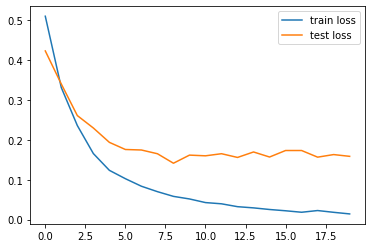

In [25]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [26]:
# Accuracy
p_train = []
y_train = []
for inputs, targets in train_iter:
    targets = targets.view(-1, 1).float()
    outputs = model(inputs)
    predictions = list((outputs > 0).cpu().numpy())
    p_train += predictions
    y_train += list(targets.cpu().numpy())

p_train = np.array(p_train)
y_train = np.array(y_train)
train_acc = np.mean(y_train == p_train)

p_test = []
y_test = []
for inputs, targets in test_iter:
    targets = targets.view(-1, 1).float()
    outputs = model(inputs)
    predictions = list((outputs > 0).cpu().numpy())
    p_test += predictions
    y_test += list(targets.cpu().numpy())

p_test = np.array(p_test)
y_test = np.array(y_test)
test_acc = np.mean(y_test == p_test)

print(f"Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")

Train accuracy: 0.9979, Test accuracy: 0.9480


In [27]:
df[df['labels'] == 'spam'].size / df.size

0.13406317300789664

In [28]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1376   77]
 [  10  209]]


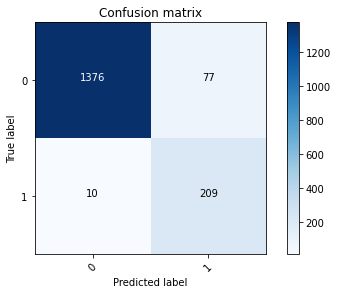

In [29]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, [0,1])

Confusion matrix, without normalization
[[3369    3]
 [   5  523]]


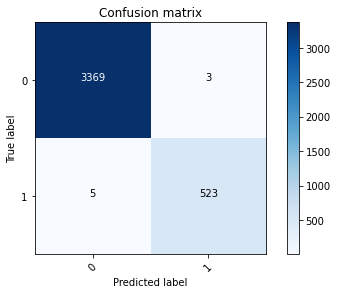

In [30]:
cm = confusion_matrix(y_train, p_train)
plot_confusion_matrix(cm, [0,1])